# TIME SERIES ANALYSIS

Time series Analysis(TSA) is a method of analyzing data points collected over time to identify patterns trends and seasonal variations. It is used to forecast future values based on historical data

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

Loading and viewing data

In [2]:
df = pd.read_csv(r"C:\Mypythonfiles\DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


Seting date as Index

In [4]:
#checking for nulls in date columns
print(df[df['date'].isna()])

Empty DataFrame
Columns: [date, meantemp, humidity, wind_speed, meanpressure]
Index: []


In [5]:
df['date']=pd.to_datetime(df['date'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [6]:
df.set_index("date",inplace = True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


visualize

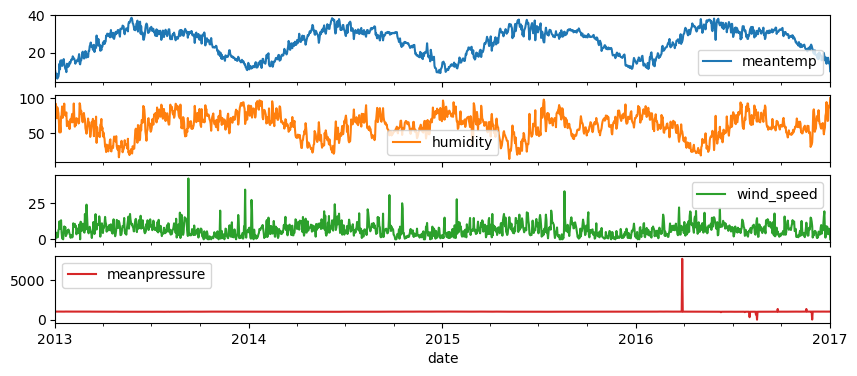

In [9]:
df.plot(figsize = (10,4), subplots = True)
plt.show()

Conclusion:
1. meantemp:
- eventually the temperature increses at the starting of the year and decreases ate the end of the year
- every year the temp has same fluctuations.
2. humidity:
- At the begining of the year the temp is raised eventually the temp decreases at the mid of the year
- it has more fluctuations compared to the meantemp.
3. wind_speed:
- here the wind speed is less but at the one point of the year the speed increases
- those fluctuations are called cyclone or the area may be damaged etc..
4. meanpreassure:
- it has constant pressure at the one point it has been fluctuated
- hence it can be recognised as any issue or  wrong recored data 

# Stationarity

A time series is stationarity if its statistical properties(mean,variance,autocorrelation) remain constant over time

Hypoteses of the ADF Test:
 - Null Hypothesis(Ho): The time series has a unit root(i.e.,it is non stationary)
 - Alternative Hypotheis(H1): The time series does not have a unit root(i.e.,it is stationary)

Interpreting ADF Test Results:
 - If the p-value is less the 0.05,reject Ho ->The series is stationary.
 - If the p-value is greater then 0.05,fail to reject Ho -> The series is non stationary.

stationary Results

In [20]:
adfuller_result = adfuller(df['meantemp'])
print(adfuller_result)

(-2.0210690559206728, 0.27741213723016056, 10, 1451, {'1%': -3.4348647527922824, '5%': -2.863533960720434, '10%': -2.567831568508802}, 5423.895746470953)


In [21]:
if adfuller_result[1] < 0.05:
    print("Stationary")
else:
    print("Non - Stationary")

Non - Stationary


# Differencing to Remove Trend: If The Series is non-stationary, apply differencing.

Differencing is the technique used to make a non-stationary time series stationary by removing trends or seasonality. It involves subtracting the previous observation from the current observation.

temperature = [20,21,22,24,25,27,28,27]

Difference = [1,1,2,1,2,1,-1]

- The new series fluctuates around zero -2 to 2

Differencing 

In [23]:
df['meantemp_diff'] = df['meantemp'].diff()
df.head()

,meantemp,humidity,wind_speed,meanpressure,meantemp_diff
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,-2.600000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,-0.233333
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.500000
2013-01-05,6.000000,86.833333,3.700000,1016.500000,-2.666667


In [26]:
adfuller_result_afterdiff = adfuller(df['meantemp_diff'].dropna())
if adfuller_result_afterdiff[1] > 0.05:
    print("Non-stationary")
else:
    print("stationary")

stationary


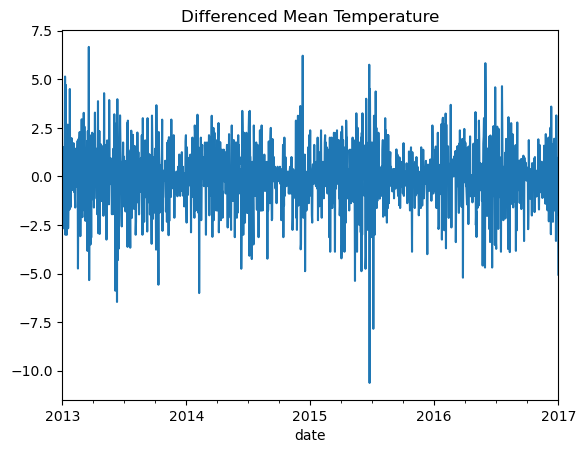

In [27]:
df['meantemp_diff'].plot(title = 'Differenced Mean Temperature')
plt.show()

Conclusion:
1. the average is around zero 
2. even after describing there is a outliers
3. mean temperature is stationary
4. there is a extreme low temperature in month between 2015 to 2016  
5. negative temperature is known as lower temperative(spik)

# use seasonal decomposition to analyze trend,seasonality and residuals.

seasonal decomposition is a technique used to break a time series into three main components:
 - Trend - The long term pattern (increase or decrease over time)
 - seasonality - the repeating patterns at fixed intervals(eg.,monthly sales spikes)
 - Residual(Noise) - The random variations that are not explained by trend or seasonality.




Interpreting the Output
 - Original series - The raw time series data.
 - Trend component - The general direction of the data over time.
 -  seasonal component - The repeating patterns(e.g.,higher scales in december)
 - Residual component - The remaining part after removing trend and  seasonality (random noise)

Decomposing

In [29]:
decomposing = seasonal_decompose(df['meantemp'],model = 'additive',period = 365)

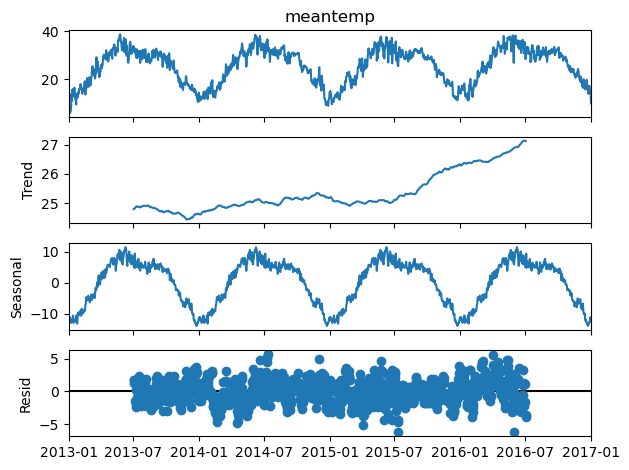

In [30]:
decomposing.plot()
plt.show()

Conclusion:
1. Trend- rapid increase in temp from the year 2015
  -  temp level started from the year 2013 is 25
  -  overall increase is 2 degres
2. sesonal - anual seasonal temp is consistent.
  -  temp increase at the starting of the year and gradually decrease in the end of the year
3.  resid - avg residual is zero.


ARIMA

In [31]:
#splitting data
len(df)

1462

In [32]:
len(df)*0.8

1169.6000000000001

In [34]:
train = df.iloc[0:1169]
test = df.iloc[1169:]

In [37]:
mymodel = ARIMA(train['meantemp'],order = (1,1,1))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [38]:
mymodel = mymodel.fit()

In [66]:
forecast = mymodel.forecast(steps = len(test))
print(forecast)

AttributeError: 'ARIMA' object has no attribute 'forecast'

In [67]:
test['forecast'] = forecast
test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6708\2382496083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast'] = forecast


,meantemp,humidity,wind_speed,meanpressure,meantemp_diff,forecast
date,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,0.322914
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,-0.040400
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,0.019656
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,0.009729
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,0.011370


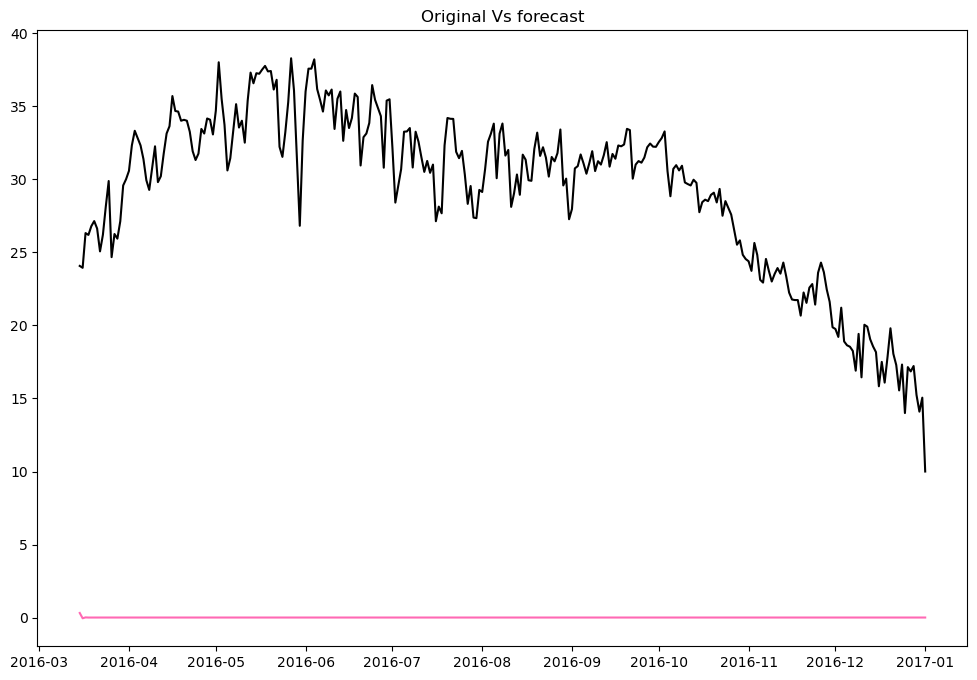

In [71]:
plt.figure(figsize=(12,8))
plt.plot(test.index,test['meantemp'], color = 'k', label= 'original')
plt.plot(test.index,test['forecast'], color = 'hotpink', label = 'Forecast')
plt.title("Original Vs forecast")
plt.show()

In [81]:
train1 = df.iloc[0:1169]
test1 = df.iloc[1169:]

In [82]:
mymodel1 = ARIMA(train['meantemp_diff'],order = (1,1,1))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [83]:
mymodel1 = mymodel1.fit()

In [84]:
forecast1 = mymodel1.forecast(steps = len(test))
print(forecast1)

2016-03-15    0.322914
2016-03-16   -0.040400
2016-03-17    0.019656
2016-03-18    0.009729
2016-03-19    0.011370
                ...   
2016-12-28    0.011137
2016-12-29    0.011137
2016-12-30    0.011137
2016-12-31    0.011137
2017-01-01    0.011137
Freq: D, Name: predicted_mean, Length: 293, dtype: float64


In [85]:
test1['forecast1'] = forecast1
test1.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6708\2863689936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['forecast1'] = forecast1


,meantemp,humidity,wind_speed,meanpressure,meantemp_diff,forecast1
date,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,0.322914
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,-0.040400
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,0.019656
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,0.009729
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,0.011370


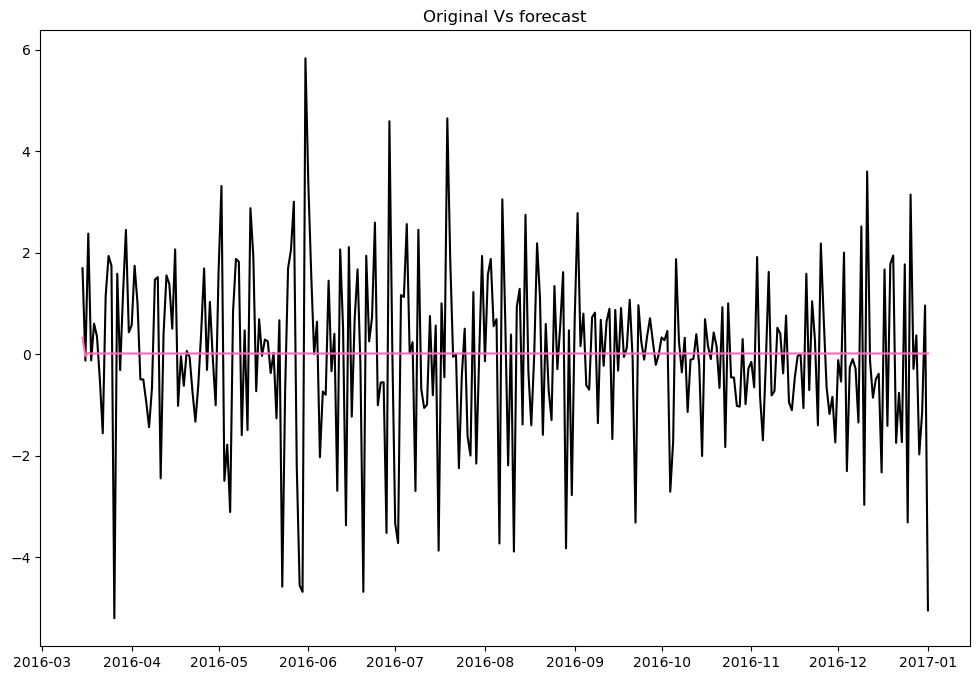

In [86]:
plt.figure(figsize=(12,8))
plt.plot(test1.index,test1['meantemp_diff'], color = 'k', label= 'original')
plt.plot(test1.index,test1['forecast1'], color = 'hotpink', label = 'Forecast')
plt.title("Original Vs forecast")
plt.show()

conclusion:
1. 15 mar , original value = 24.066667, model says there is -0.040438 change on next day 
  - 24.066667-0.040438 = 24.02(predicted) ~ 23.937500(oroginal)